# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorther... predicting a number.

In [64]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.12.0


## Creating data to view and fit

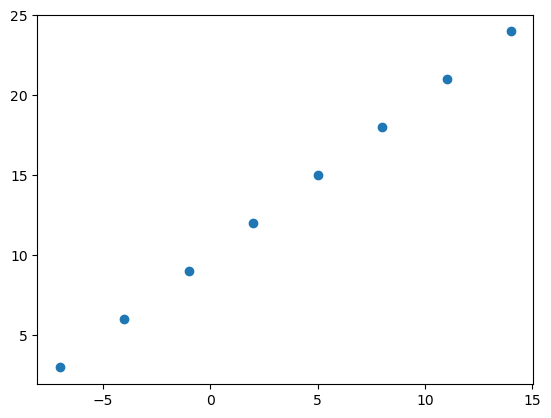

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [66]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [67]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [68]:
X[0], y[0]

(-7.0, 3.0)

In [69]:
X[1], y[1]

(-4.0, 6.0)

In [70]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [71]:
X[0].ndim

0

In [72]:
X[0], y[0]

(-7.0, 3.0)

In [73]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [74]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

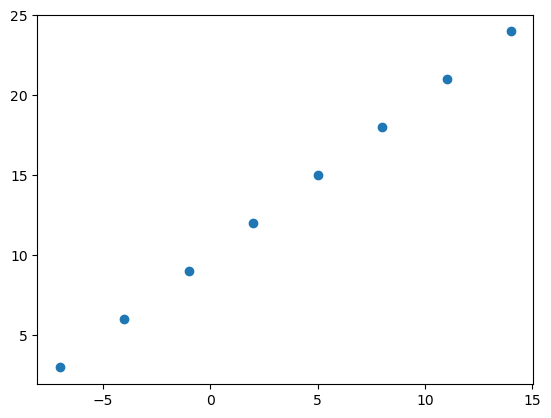

In [75]:
plt.scatter(X, y)

## Steps in modeling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [76]:
# # Optionally, the first layer can receive an `input_shape` argument:
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
# # Afterwards, we do automatic shape inference:
# model.add(tf.keras.layers.Dense(4))
# 
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(8, input_shape=(16, )))
# ...
# 
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))

In [77]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochstic gradient descent
              metrics=["mae"])

# 3. Fit the model
# model.fit(X, y, epochs=5) # This line will error if you're running TensorFlow 2.7.0+!
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 276ms/step - loss: 9.2568 - mae: 9.2568
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 9.1243 - mae: 9.1243
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 8.9918 - mae: 8.9918
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 8.8593 - mae: 8.8593
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 8.7268 - mae: 8.7268


In [78]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [79]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 55ms/step


array([[23.634716]], dtype=float32)

In [80]:
y_pred + 9

array([[32.634716]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [81]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 280ms/step - loss: 14.4515 - mae: 14.4515
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 14.3190 - mae: 14.3190
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 14.1865 - mae: 14.1865
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 14.0540 - mae: 14.0540
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 13.9215 - mae: 13.9215
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 13.7890 - mae: 13.7890
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 13.6565 - mae: 13.6565
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 13.5240 - mae: 13.5240
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 13.3915 - mae: 13.3915
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 13.2590 - mae: 13.2590
Epoch 11/100
1/1 [==============================] - 0s 4m

In [82]:
# Reminder ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [83]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 58ms/step


array([[29.588236]], dtype=float32)

In [91]:
# Let's see if we can make another to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 410ms/step - loss: 13.9207 - mae: 13.9207
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 13.2239 - mae: 13.2239
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 12.5305 - mae: 12.5305
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 11.8394 - mae: 11.8394
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 11.1494 - mae: 11.1494
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 10.4584 - mae: 10.4584
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 9.7634 - mae: 9.7634
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 9.0612 - mae: 9.0612
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 8.3483 - mae: 8.3483
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 7.6209 - mae: 7.6209
Epoch 11/100
1/1 [==============================] - 0s 8ms/step

In [92]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [94]:
# Let's  try to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 42ms/step


array([[27.247622]], dtype=float32)

## Evaluating a model